**Authors:** Mete Aslan, Cihat Kaya

# Linear Regression

### What is Linear Regression?


<img align="left" src="https://github.com/MeteAslan/Utils/blob/main/linear%20reg.png?raw=true" width=450 > 



Linear regression is a statistical method of finding the relationship between independent and dependent variables.

**Linear** means in a particular line and **Regression** means a measure of the relationship hence Linear Regression is a linear relationship of the data (independent variable) with the output (target variable).

For example: associating years of professional experience with remuneration.

In this case, “Years of Experience” is an independent variable (ie., we cannot mathematically determine the years of experience) and “Compensation” is a dependent variable (goal is to determine / predict salary — the dependent variable — based on years of experience).


**Types of Linear Regression**
<ul>
<li>Simple Linear Regression</li>
<li>Multiple Linear Regression</li>
</ul>



## Simple Linear Regression
- Learn to implement the model $f_{w,b}$ for linear regression with **one variable**

In [ ]:
import pandas as pd 
import numpy as np
import math, time, copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data['Salary'] = data['Salary'] / 10000 # salary $10000

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,3.9343
1,1.3,4.6205
2,1.5,3.7731
3,2.0,4.3525
4,2.2,3.9891


In [ ]:
x = data['YearsExperience'].values # indepent variable --> feature
y = data['Salary'].values # dependent variable --> target

In [ ]:
# train test split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print("number of train examples: {}\nnumber of test examples: {}".format(x_train.shape[0],x_test.shape[0]))

number of train examples: 27
number of test examples: 3


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1000,3.200000,4.7000,7.700000,10.5000
Salary,30.0,7.600300,2.741443,3.7731,5.672075,6.5237,10.054475,12.2391


### Plot Data

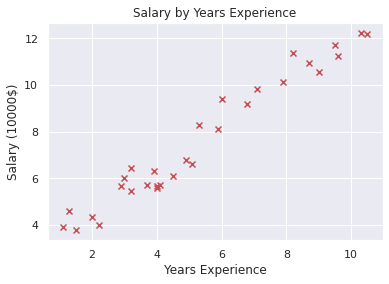

In [ ]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Salary by Years Experience")
# Set the y-axis label
plt.ylabel('Salary (10000$)')
# Set the x-axis label
plt.xlabel('Years Experience')
plt.show()

### Model Function

<img align="left" style="padding:3px" src="https://github.com/MeteAslan/Utils/blob/main/C1_W1_L3_S1_model.png?raw=true" width=450>

&nbsp;&nbsp;As described in lecture, the model function for linear regression (which is a &nbsp;&nbsp;function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

&nbsp;&nbsp;The formula above is how you can represent straight lines - different values of &nbsp;&nbsp;$w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 5$ and $b = 5$. 



In [ ]:
# pick random values for w and b parameters
w = 5
b = 5

In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

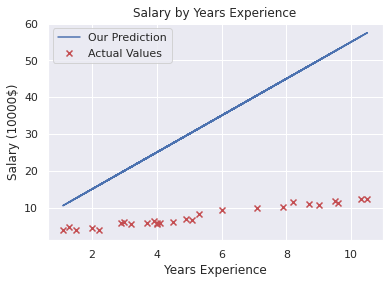

In [ ]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Salary by Years Experience")
# Set the y-axis label
plt.ylabel('Salary (10000$)')
# Set the x-axis label
plt.xlabel('Years Experience')
plt.legend()
plt.show()

Now that you have understood the theory about the regression line, let’s discuss how can we select the best-fit regression line for a particular model using **cost or loss functions**.

### Cost Function

<img src="https://github.com/MeteAslan/Utils/blob/main/cost-linear.png?raw=true" width=500>

The **cost function** is the function that computes the distance between the current output <b>ŷ<sub>i</sub></b> of the algorithm and the expected output <b>y<sub>i</sub></b>. It’s a method to evaluate how your algorithm models the data.

In short, cost function measures how well a given machine learning model fits the specific data set.





### Computing Cost

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 

</br>

where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  


  

In [ ]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b    
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

### Plot Cost Function Curve
<img src="https://github.com/MeteAslan/Utils/blob/main/C1_W1_Lab02_GoalOfRegression.PNG?raw=true" width=450 align=left>

&nbsp;&nbsp;Our goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which &nbsp;&nbsp;will accurately predict house values given an input $x$. The cost is a measure of &nbsp;&nbsp;how accurate the model is on the training data.

&nbsp;&nbsp;The cost equation (1) above shows that if $w$ and $b$ can be selected such that &nbsp;&nbsp;the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ &nbsp;&nbsp;term will be zero and the cost minimized. In this simple two point example, you &nbsp;&nbsp;can achieve this!


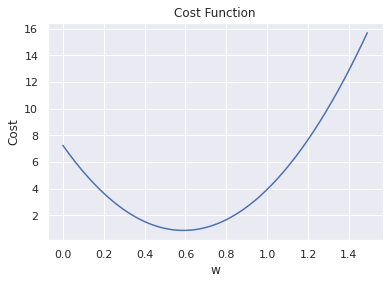

In [ ]:
cost = []
tmp_w = [i/100 for i in range(0,150)] # create different values for w parameters.

for i in tmp_w:
    cost.append(compute_cost(x_train,y_train,i,b)) # calculate cost and store in a list
    
plt.plot(tmp_w,cost) # plot cost function

plt.title("Cost Function")

plt.ylabel('Cost')

plt.xlabel('w')
plt.show()

Our goal is to **minimize** the error made by our model. To achieve this, we need to minimize the difference between our estimates and actual values. So how do we do this?

### What is Gradient Descent?
Gradient descent is an iterative optimization algorithm to **find the minimum of a function**. Here, that function refers to the **cost function**.

With this process, we will have found the best-fit line for given training dataset.
<hr>


So far, we have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

*gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

#### Compute Gradient

`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$.

In [ ]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

<img align="left" src="https://github.com/MeteAslan/Utils/blob/main/C1_W1_Lab03_lecture_slopes.PNG?raw=true"   width=450 > 
<br/><br/>
&nbsp;&nbsp;The lectures described how gradient descent utilizes the partial derivative of &nbsp;&nbsp;the cost with respect to a parameter at a point to update that parameter.   
&nbsp;&nbsp;Let's use our `compute_gradient` function to find and plot some partial &nbsp;&nbsp;derivatives of our cost function relative to one of the parameters, $w_0$.

####  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-5
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train , y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 32.55022617222857  dj_dw: -4.819e+01, dj_db: -7.565e+00   w:  4.819e-04, b: 7.56498e-05
Iteration 1000: Cost 15.805562828679657  dj_dw: -3.312e+01, dj_db: -5.365e+00   w:  4.023e-01, b: 6.40283e-02
Iteration 2000: Cost 7.881863786938175  dj_dw: -2.276e+01, dj_db: -3.851e+00   w:  6.785e-01, b: 1.09627e-01
Iteration 3000: Cost 4.131559168458005  dj_dw: -1.563e+01, dj_db: -2.809e+00   w:  8.682e-01, b: 1.42597e-01
Iteration 4000: Cost 2.3557836470105227  dj_dw: -1.073e+01, dj_db: -2.092e+00   w:  9.984e-01, b: 1.66877e-01
Iteration 5000: Cost 1.5142067016589413  dj_dw: -7.357e+00, dj_db: -1.599e+00   w:  1.088e+00, b: 1.85176e-01
Iteration 6000: Cost 1.114625552711498  dj_dw: -5.037e+00, dj_db: -1.259e+00   w:  1.149e+00, b: 1.99358e-01
Iteration 7000: Cost 0.9241684474145261  dj_dw: -3.441e+00, dj_db: -1.025e+00   w:  1.191e+00, b: 2.10704e-01
Iteration 8000: Cost 0.8326587212370912  dj_dw: -2.344e+00, dj_db: -8.636e-01   w:  1.219e+00, b: 2.20096e-01
Iteration 9000

#### Learning Rate

<img src="https://github.com/MeteAslan/Utils/blob/main/learnin-rate.png?raw=true" width=700> </br>
*Also on using Gradient descent, the term learning rate comes into the picture. The learning rate is denoted by α and this parameter controls how much the value of w and b should change after each iteration/step. Selecting the proper value of α is also important as shown in Figure.



#### Cost Versus Iterations of Gradient Descent 
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs.

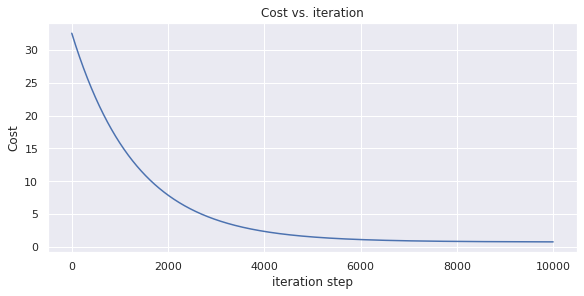

In [ ]:
# plot cost versus iteration  
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(8,4))
ax1.plot(J_hist)

ax1.set_title("Cost vs. iteration");  
ax1.set_ylabel('Cost')            
ax1.set_xlabel('iteration step')   
plt.show()

In [ ]:
def predict(x, w_final, b_final):
  return x * w_final + b_final

### Plot the linear fit

In [ ]:
predicted = compute_model_output(x_train, w_final, b_final)

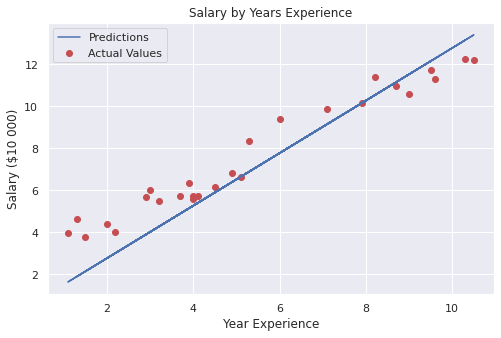

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

ax.set_title('Salary by Years Experience')
ax.set_ylabel("Salary ($10 000)")
ax.set_xlabel("Year Experience")

plt.scatter(x_train, y_train, label="Actual Values", c='r')
plt.plot(x_train, predicted, label="Predictions", c='b')

ax.legend()
plt.show()

In [ ]:
# Evaluate model with test data
predicted_test = compute_model_output(x_test, w_final, b_final)

In [ ]:
d = {'YearsExperience': x_test,'Salary': y_test, 'Prediction': predicted_test}
df = pd.DataFrame(data=d)
df

,YearsExperience,Salary,Prediction
0,3.2,6.4445,4.241800
1,5.9,8.1363,7.622328
2,6.8,9.1738,8.749171


In [ ]:
test_error = mean_squared_error(y_test, predicted_test) # error metrics
print("Data set test error is {}".format(test_error))

Data set test error is 1.7654544306705935


## Multiple Linear Regression

Multiple linear regression is used to estimate the relationship between **two or more** independent variables and one dependent variable. 

- Extend our regression model  routines to support **multiple features**
    - Extend data structures to support multiple features
    - Rewrite prediction, cost and gradient routines to support multiple features

## 1-Multiple features(variables)
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  
| ...             | ...                 | ...              | ...          | ...           | 
| ...             | ...                 | ...              | ...          | ...           |


- $\mathbf{x}_{(j)}$ $j^{th}$ features ---> j = 1,2,3,4
- n = number of features(n = 4)
- $\mathbf{x}^{(i)}$ features of $i^{th}$ training example --->  $x^{(2)}$ = [1416 3 2 40]
- $x^{(i)}_j$ value of feature in j in $i^{th}$ training example ---> $x^{2}_3$ = 2

In [ ]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

## 2-Matrix X and y containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).

$$\mathbf{X} = 
\begin{pmatrix}
 2104 & 5 & 1 & 45 \\ 
 1416 & 3 & 2 & 40 \\
  x^{(2)}_0 & x^{(2)}_1 & \cdots & x^{(2)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

$$\mathbf{Y} = 
\begin{pmatrix}
 460 \\ 
 232 \\
 y^{(2)}\\
 \cdots \\
 y^{(m-1)}
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

## 2.2-Parameter vector w, b
* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4 because each element has a value of w.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


## 3-Model With Multiple Variables
The model's prediction with multiple variables is given by the linear model:
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  $$ 
where $\cdot$ is a vector `dot product` and it is called `vectorization`

## 3.1-Vectorization
When you're implementing a learning algorithm, using vectorization will both make your code shorter and also make it run much more efficiently.

example code of dot product from numpy:
$$ np.dot(x, w) $$

The dot product multiplies the values in two vectors element-wise and then sums the result. Vector dot product requires the dimensions of the two vectors to be the same.

This NumPy dot function is a vectorized implementation of the dot product operation between two vectors and especially when n is large, this will run much faster than the two previous code examples.

Let's make an experiment with **Using a for loop** and **Using a numpy**
İmplement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
- a and b should be same size.

In [ ]:
def dot_with_for_loop(a,b):
    """
   Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      dot (scalar): 
    """
    dot = 0
    for i in range(a.shape[0]):
        dot += a[i]*b[i]
    return dot

In [ ]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
print(f"dot_with_for_loop(a, b) = {dot_with_for_loop(a, b)}")

dot_with_for_loop(a, b) = 24


In [ ]:
#same test with numpy
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
dot = np.dot(a,b)
print(f"np.dot(a,b) = {dot}")

np.dot(a,b) = 24


##### Vectorization speed test

In [ ]:
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = dot_with_for_loop(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

del(a);del(b)  #remove these big arrays from memory

np.dot(a, b) =  2501072.5817
Vectorized version duration: 18.1224 ms 
my_dot(a, b) =  2501072.5817
loop version duration: 3643.4646 ms 


## 4-Compute Cost With Multiple Variables

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  $$ 
now our cost function:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} ((\sum\limits_{j = 0}^{n} w_{j}x^{(i)}_j) - y^{(i)})^2$$ 
where:
$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$

In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [ ]:
def compute_cost(x, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        error = f_wb - y[i]
        cost += error**2
    cost = cost/(2*m)
    return cost


In [ ]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


## 5-Gradient Descent With Multiple Variables

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$

$\alpha$ is called learning rate.


$\alpha$ is basically controls how big step you take downhill. If alpha is very large, then that corresponds to very agressive gradient descent procedure where you're trying to take huge steps downhill. If small, then you'd be taking small baby steps downhill.

* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


<a name="toc_15456_5.1"></a>
## 5.1 Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an

*   outer loop over all m examples.
  -  $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
 -  in a second loop over all n features:
      - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.

   

In [ ]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [ ]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


## 6-Gradient Descent With Multiple Variables

The routine below implements equation:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db              
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


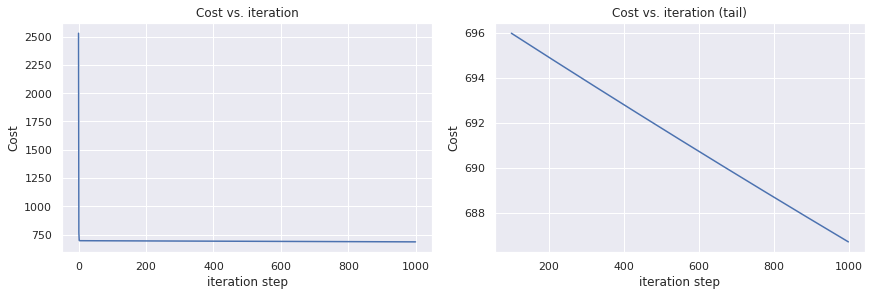

In [ ]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

*These results are not inspiring*! Cost is still declining and our predictions are not very accurate. Now we will explore how to improve on this.

## Feature Scaling

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. 


### Why do we need feature scale?

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. 

If an algorithm uses gradient descent, then the difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale will help the gradient descent converge more quickly towards the minima.


## Techniques to perform Feature Scaling

### 1-) Min Max Scaler

$ X_iscaled = \frac{(X_i)}{max} $


### 2-) Mean Normalization

$x_i := \dfrac{x_i - \mu_i}{max - min} $ 

### 3-) Standardization

$x_i := \dfrac{x_i - \mu_i}{\sigma} $ 

### 4-) Z-score

$x_j = \dfrac{x_i - \mu_i}{\sigma_i} $

$\mu $ means average 


### Expanding Our housing price dataset 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/houses.txt', sep=',',header=None)

df.columns = ['Size(sqft)','Bedrooms','Floors','Age','Price (1000s dollars)']
df.head()

,Size(sqft),Bedrooms,Floors,Age,Price (1000s dollars)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [ ]:
X_train = df.drop('Price (1000s dollars)', axis=1).values
y_train = df['Price (1000s dollars)'].values

Let's select min max scaling technique 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

# define min max scaler
scaler = MinMaxScaler()

# transform data
X_norm = scaler.fit_transform(X_train)

X_norm[:5] # first 5 data of X_norm

array([[0.06816293, 0.5       , 0.        , 0.55789474],
       [0.18952618, 0.75      , 0.        , 0.54736842],
       [0.48171239, 0.75      , 1.        , 0.05263158],
       [0.38944306, 0.75      , 1.        , 0.31578947],
       [0.48669992, 0.75      , 1.        , 0.03157895]])

Visualize data before feature scaling

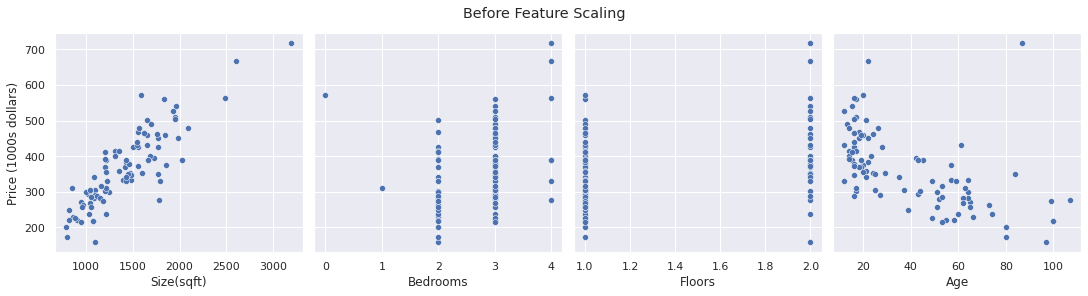

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(15, 4), constrained_layout=True, sharey=True)

columns = df.columns # column names of our data frame

fig.suptitle('Before Feature Scaling')

for i in range(len(ax)):
    sns.scatterplot(data=df, x=columns[i], y='Price (1000s dollars)', ax = ax[i] )
    ax[i].set_xlabel(columns[i])


Visualize data after feature scaling

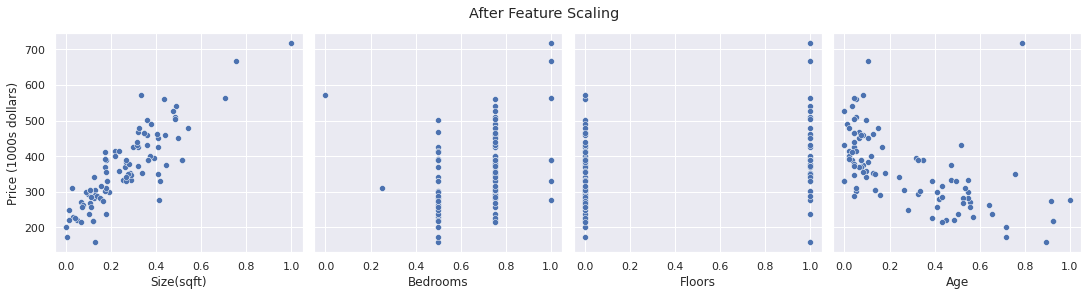

In [ ]:
normalize_df = pd.DataFrame(np.column_stack( (X_norm,y_train) ),
                   columns=['Size(sqft)','Bedrooms','Floors','Age','Price (1000s dollars)'])

fig,ax = plt.subplots(1, 4, figsize=(15, 4), constrained_layout=True, sharey=True)

columns = normalize_df.columns 

fig.suptitle('After Feature Scaling')

for i in range(len(ax)):
    sns.scatterplot(data=normalize_df, x=columns[i], y='Price (1000s dollars)', ax = ax[i] )
    ax[i].set_xlabel(columns[i])

**Cost Contours** 
<br> 
<img align="left" src="https://github.com/MeteAslan/Utils/blob/main/C1_W2_Lab06_contours.PNG?raw=true" hspace=10  width=350>

Another way to view feature scaling is in terms of the cost contours. When feature scales do not match, the plot of cost versus parameters in a contour plot is asymmetric. 

In the plot below, the scale of the parameters is matched. The left plot is the cost contour plot of w[0], the square feet versus w[1], the number of bedrooms before normalizing the features. The plot is so asymmetric, the curves completing the contours are not visible. In contrast, when the features are normalized, the cost contour is much more symmetric. The result is that updates to parameters during gradient descent can make equal progress for each parameter. 


## Linear Regression Exercise

In [ ]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import copy
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# import our models
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


### Description
<hr>

The data are a subsample of 500 observations from a data set that originate in a study where air pollution at a road is related to traffic volume and meteorological variables, collected by the Norwegian Public Roads Administration. The response variable (column 1) consist of hourly values of the logarithm of the concentration of NO2 (particles), measured at Alnabru in Oslo, Norway, between October 2001 and August 2003.

The predictor variables (columns 2 to 8) are the logarithm of the number of cars per hour, temperature $2$ meter above ground (degree C), wind speed (meters/second), the temperature difference between $25$ and $2$ meters above ground (degree C), wind direction (degrees between 0 and 360), hour of day and day number from October 1. 2001.

<hr>

In [ ]:
data = loadarff('/content/drive/MyDrive/datasets/no2.arff')
df = pd.DataFrame(data[0]) # read the data as pandas data frame

In [ ]:
df.head()

,no2_concentration,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,day
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20.0,600.0
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14.0,196.0
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4.0,513.0
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23.0,143.0
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11.0,115.0


In [ ]:
df.info() # information about a DataFrame including the index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no2_concentration        500 non-null    float64
 1   cars_per_hour            500 non-null    float64
 2   temperature_at_2m        500 non-null    float64
 3   wind_speed               500 non-null    float64
 4   temperature_diff_2m_25m  500 non-null    float64
 5   wind_direction           500 non-null    float64
 6   hour_of_day              500 non-null    float64
 7   day                      500 non-null    float64
dtypes: float64(8)
memory usage: 31.4 KB


In [ ]:
df.describe().T # it gives us some statistical insight about data

,count,mean,std,min,25%,50%,75%,max
no2_concentration,500.0,3.698368,0.750597,1.22378,3.213862,3.84802,4.216930,6.39509
cars_per_hour,500.0,6.973342,1.087166,4.12713,6.175842,7.42536,7.793175,8.34854
temperature_at_2m,500.0,0.847400,6.524636,-18.60000,-3.900000,1.10000,4.900000,21.10000
wind_speed,500.0,3.056000,1.784172,0.30000,1.675000,2.80000,4.200000,9.90000
temperature_diff_2m_25m,500.0,0.149400,1.065237,-5.40000,-0.200000,0.00000,0.600000,4.30000
wind_direction,500.0,143.370400,86.510213,2.00000,72.000000,97.00000,220.000000,359.00000
hour_of_day,500.0,12.382000,6.802693,1.00000,6.000000,12.50000,18.000000,24.00000
day,500.0,310.474000,200.977754,32.00000,118.750000,212.00000,513.000000,608.00000


### Review relations in the data

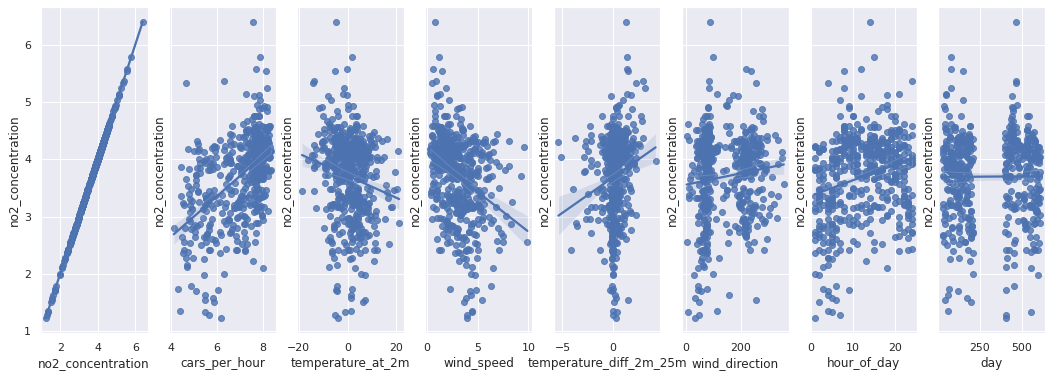

In [ ]:
fig,ax = plt.subplots(1, 8, figsize=(18, 6), sharey=True)

columns = df.columns # column names of our data frame

for i in range(len(ax)):
    sns.regplot(data=df, x=columns[i], y='no2_concentration', ax = ax[i] )
    ax[i].set_xlabel(columns[i])


### Train Test Split 
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
X = df.drop(['no2_concentration'], axis=1) # features
y = df['no2_concentration'] # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print ('The shape of x_train is:', X_train.shape)
print ('The shape of x_test is:', X_test.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('The shape of y_test is:', y_test.shape)

The shape of x_train is: (400, 7)
The shape of x_test is: (100, 7)
The shape of y_train is:  (400,)
The shape of y_test is: (100,)


### Feature Scaling

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

<p align="center">
<img src="https://github.com/MeteAslan/Utils/blob/main/min%20max%20scale.png?raw=true" width=350>
</p>

After min-max scaling or normalization, all features will scale between 0 and 1.

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

print(f'X_train_norm => max: {X_train_norm.max():.2f} min: {X_train_norm.min()}')

X_train_norm => max: 1.00 min: 0.0


#### Let's review the distribution of our data after the min-max scale operation.

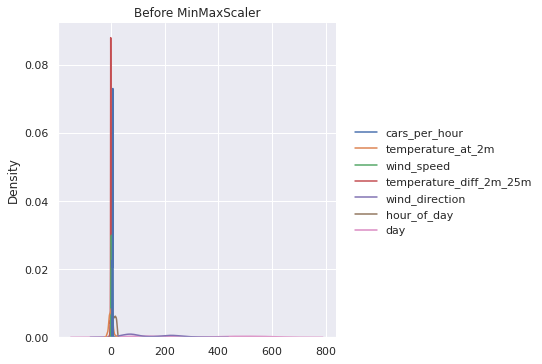

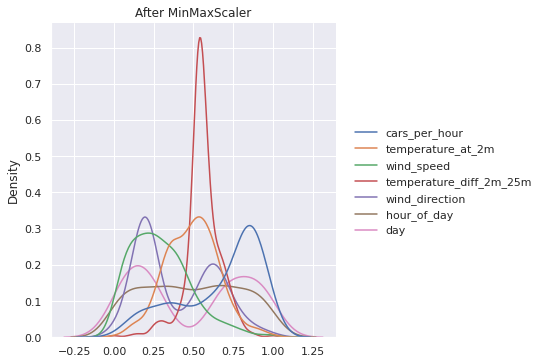

In [ ]:
X_train_norm_df = pd.DataFrame(data=X_train_norm, columns = X.columns)

sns.displot(data=X_train, kind="kde").set(title='Before MinMaxScaler')
sns.displot(data = X_train_norm_df,kind="kde").set(title='After MinMaxScaler')
plt.show()

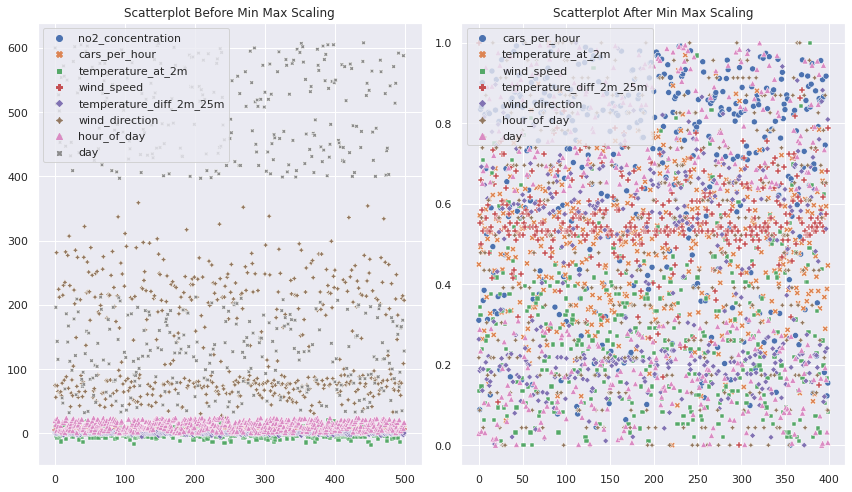

In [ ]:
# plotting the scatterplot of before and after Min Max Scaling
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Min Max Scaling", fontsize=12)
sns.scatterplot(data = df)
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.title("Scatterplot After Min Max Scaling", fontsize=12)
sns.scatterplot(data = X_train_norm_df)
plt.tight_layout()
plt.show()

### Training the Model
Now its time to train our model on our training data!

In [ ]:
lr = LinearRegression()
lr.fit(X_train_norm,y_train)

LinearRegression()

### Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [ ]:
predictions = lr.predict(X_test_norm)

**Create a scatterplot of the real test values versus the predicted values.**

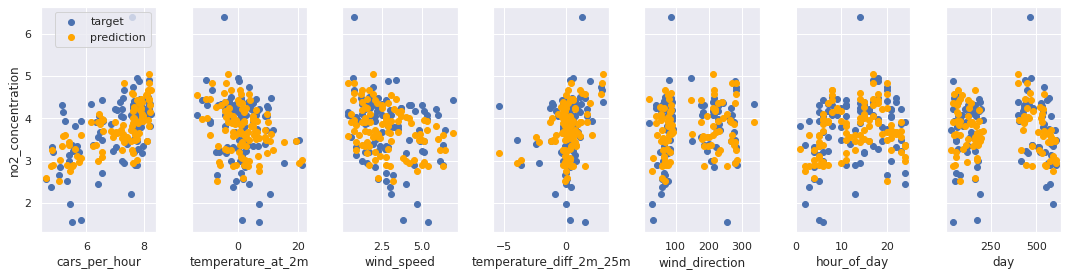

In [ ]:
fig,ax=plt.subplots(1,7,figsize=(15, 4),sharey=True)
cols = X_test.columns

for i in range(len(ax)):
      ax[i].scatter(X_test.iloc[:,i], y_test, label = 'target')
      ax[i].set_xlabel(cols[i])
      ax[i].scatter(X_test.iloc[:,i], predictions, color='orange', label = 'prediction')

      ax[0].set_ylabel("no2_concentration"); 
      ax[0].legend();
      plt.tight_layout()

plt.tight_layout()
plt.show()

### Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

- MSE = $\sum_{i=1}^{D}(Actual - Predicted)^2$

- MAE = $(\frac{1}{n})\sum_{i=1}^{n}\left | Actual - Predicted \right |$

In [ ]:
print('MSE: {}'.format(mean_squared_error(y_test, predictions)))
print('MAE: {}'.format(mean_absolute_error(y_test, predictions)))

MSE: 0.2787496102323158
MAE: 0.4141357224165681


The R2 doesn't tell us about how far or close each predicted value is from the real data - it tells us how much of our target is being captured by our model.

The R2 metric varies from 0% to 100%. The closer to 100%, the better. If the R2 value is negative, it means it doesn't explain the target at all.

In [ ]:
lr.score(X_test_norm,y_test) # R2 score

0.5038688367697692

**References:**
- https://www.coursera.org/learn/machine-learning
- https://medium.com/analytics-vidhya/understanding-linear-regression-in-depth-intuition-6c9f3b1cbb51
- https://medium.com/@minions.k/gradient-descent-algo-d7b180605d7c#:~:text=Linear%20Regression%3A%20Gradient%20Descent%20Method,the%20parameters%20of%20our%20model.
- https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/s.
- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
- https://julienbeaulieu.gitbook.io/wiki/sciences/machine-learning/linear-regression/feature-scaling-and-normalization
- https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples
- https://www.openml.org/search?type=data&status=active&id=547
- https://medium.com/@tansu_61955/linear-regression-simplified-for-people-with-non-technical-background-9962173360d6